In [1]:
import sys
sys.path.append('./../../designer/script')
sys.path.append('./../../')
sys.path.append('./../')
sys.path.append('./')

from analyze_utils.structure import plot_layer_thickness

from film import TwoMaterialFilm, FreeFormFilm, EqOTFilm
from spectrum import BaseSpectrum

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import copy
import pickle

film has no spec. use 1000 nm


/root/miniconda3/envs/tfnn/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/root/miniconda3/envs/tfnn/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(6600+0j)


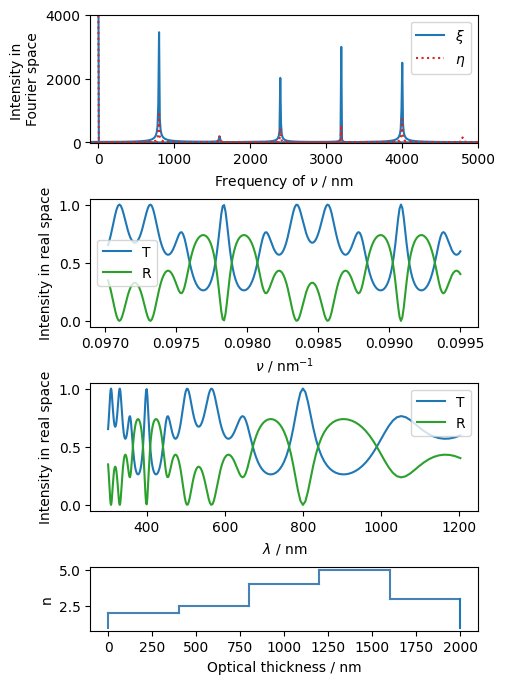

In [48]:
wls = np.linspace(1 / 10, 1 / 3000, 10000)
wls = 1 / wls

film = EqOTFilm(np.array([2, 2.5, 4, 5, 3]), 2000, '1')
film.add_spec_param(0., wls)


R = film.get_spec().get_R()
T = film.get_spec().get_T()

Q1_name = '$\\xi$'
Q2_name = '$\\eta$'
Q1 = R / T
Q2 = 1 / T


fig, axes = plt.subplots(4, 1, gridspec_kw={'height_ratios': (2, 2, 2, 1), 'hspace': 0.5})

film_spec = film.get_spec(inc_ang=0, wls=np.linspace(400, 1200, 500))
ax = axes[0]
ax.plot(np.fft.fftfreq(wls.shape[0], 1 * (1 / wls[0] - 1 / wls[-1]) / wls.shape[0]), np.abs(np.fft.fft(Q1)), label=f'{Q1_name}', c='C0')
ax.plot(np.fft.fftfreq(wls.shape[0], 1 * (1 / wls[0] - 1 / wls[-1]) / wls.shape[0]), np.abs(np.fft.fft(Q2)), label=f'{Q2_name}', c='C3', ls=':')
ax.set_ylim(-10, 4000)
ax.set_xlim(-100, 5000)
ax.set_xlabel('Frequency of $\\nu$ / nm')
ax.set_ylabel(f'Intensity in \nFourier space')
ax.legend()

ax = axes[1]
idx = np.arange(9700, 9950)
ax.plot((1 / wls[::-1])[idx], T[idx], label='T', c='C0')
ax.plot((1 / wls[::-1])[idx], R[idx], label='R', c='C2')
# ax.set_xticks(wls[np.arange(0, 10000, 1000)])
# ax.set_xticklabels(wls[np.arange(0, 10000, 1000)])
ax.set_xlabel('$\\nu$ / nm$^{-1}$')
ax.set_ylabel('Intensity in real space')
ax.legend()

ax = axes[2]
idx = np.arange(9700, 9950)
ax.plot(wls[idx], T[idx], label='T', c='C0')
ax.plot(wls[idx], R[idx], label='R', c='C2')
# ax.set_xticks(wls[np.arange(0, 10000, 1000)])
# ax.set_xticklabels(wls[np.arange(0, 10000, 1000)])
ax.set_xlabel('$\\lambda$ / nm')
ax.set_ylabel('Intensity in real space')
ax.legend()


film.update_d(film.get_d() * film.get_n())
plot_layer_thickness(film, ax=axes[3])
axes[3].set_ylabel('n')
axes[3].set_xlabel('Optical thickness / nm')

fig.set_size_inches(5, 8)
fig.savefig(f'./images/FFT/spec_demo.pdf', bbox_inches='tight')

print(film.get_optical_thickness(1))